# **HW3-1**


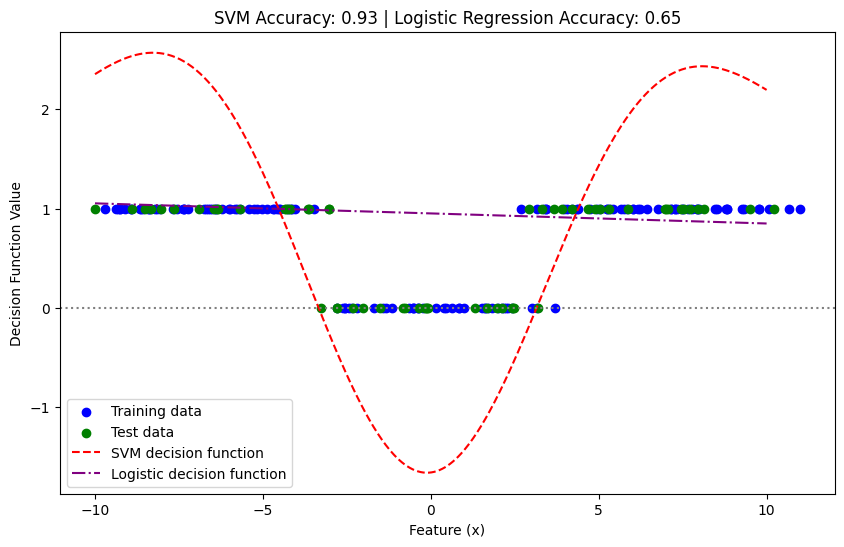

(0.9333333333333333, 0.65)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Step 1: Generate the 1D dataset
np.random.seed(0)
x = np.linspace(-10, 10, 200)  # 200 points from -10 to 10
y = np.where((x < -3) | (x > 3), 1, 0)  # y=1 for x<-3 or x>3, else y=0

# Add some noise to make it more realistic
x += np.random.normal(0, 0.5, x.shape)

# Split into train and test sets
x_train, x_test, y_train, y_test = train_test_split(x.reshape(-1, 1), y, test_size=0.3, random_state=42)

# Step 2: Train SVM and Logistic Regression models
svm_model = SVC(kernel='rbf', gamma='scale')
logistic_model = LogisticRegression()

svm_model.fit(x_train, y_train)
logistic_model.fit(x_train, y_train)

# Step 3: Evaluate the models
y_pred_svm = svm_model.predict(x_test)
y_pred_logistic = logistic_model.predict(x_test)

accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)

# Visualization of the dataset and decision boundaries
x_plot = np.linspace(-10, 10, 500).reshape(-1, 1)
y_plot_svm = svm_model.decision_function(x_plot)
y_plot_logistic = logistic_model.decision_function(x_plot)

# Plotting
plt.figure(figsize=(10, 6))
plt.scatter(x_train, y_train, color='blue', label='Training data')
plt.scatter(x_test, y_test, color='green', label='Test data')
plt.plot(x_plot, y_plot_svm, color='red', linestyle='--', label='SVM decision function')
plt.plot(x_plot, y_plot_logistic, color='purple', linestyle='-.', label='Logistic decision function')
plt.axhline(0, color='grey', linestyle=':')
plt.title(f"SVM Accuracy: {accuracy_svm:.2f} | Logistic Regression Accuracy: {accuracy_logistic:.2f}")
plt.xlabel("Feature (x)")
plt.ylabel("Decision Function Value")
plt.legend()
plt.show()

accuracy_svm, accuracy_logistic


## HW3-2 test

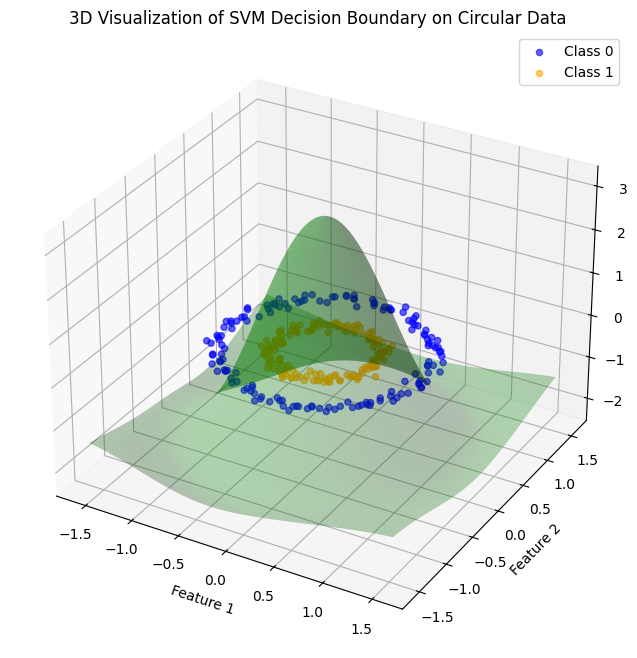

In [1]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_circles
from sklearn.svm import SVC
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Generate the circular 2D dataset
X, y = make_circles(n_samples=300, factor=0.5, noise=0.05, random_state=0)

# Step 2: Train the SVM model with RBF kernel
svm_model_2d = SVC(kernel='rbf', gamma='scale')
svm_model_2d.fit(X, y)

# Step 3: Prepare the 3D plot data
# Generate a mesh grid for the 2D space
x_range = np.linspace(X[:, 0].min() - 0.5, X[:, 0].max() + 0.5, 100)
y_range = np.linspace(X[:, 1].min() - 0.5, X[:, 1].max() + 0.5, 100)
xx, yy = np.meshgrid(x_range, y_range)

# Calculate the decision function values for each point in the grid
xy_mesh = np.c_[xx.ravel(), yy.ravel()]
z = svm_model_2d.decision_function(xy_mesh).reshape(xx.shape)

# Step 4: 3D Plotting of the decision boundary and dataset points
fig = plt.figure(figsize=(12, 8))
ax = fig.add_subplot(111, projection='3d')

# Plot the data points
ax.scatter(X[y == 0][:, 0], X[y == 0][:, 1], 0, color='blue', label='Class 0', alpha=0.6)
ax.scatter(X[y == 1][:, 0], X[y == 1][:, 1], 0, color='orange', label='Class 1', alpha=0.6)

# Plot the decision boundary in 3D
ax.plot_surface(xx, yy, z, rstride=1, cstride=1, color='green', alpha=0.3, edgecolor='none')

# Set labels and title
ax.set_xlabel('Feature 1')
ax.set_ylabel('Feature 2')
ax.set_zlabel('Decision Function')
ax.set_title('3D Visualization of SVM Decision Boundary on Circular Data')
ax.legend()

plt.show()